![example](images/director_shot.jpeg)

# Project Title

**Authors:** John, Wilber, Maureen,Stella, Isaiah
***

## Overview

Rilsoft aims to capitalize on the rising trend of movie creation by establishing a new studio. As newcomers to the industry, the team seeks to leverage data from leading movie review platforms to generate actionable insights that will guide their entry into the competitive movie-making landscape.

## Business Problem

Rilsoft wants to venture in the movie industry to compete with other big companies that create original video content. They have the challenge of determining optimal approach to the market. The problem is how to balance financial investment, creative vision and market demand.

***
## Objectives:
* To understand  high-performing movie genres
* To understand revenue projections and ROI based on the  various movie genres.
* To Provide recommendations based on film genres with the highest ratings
* To help fomulate budget allocation
* To understand marketing strategies
* To help in analyzing the various roles for creative movie production
***

***
## Business Questions:
* Which audience demographics are most likely to engage with high-rated, high-ROI movie genres?
* What movie genres consistently deliver the best ratings and return on investment for budget allocation?
* How can marketing strategies be optimized based on the performance of top-rated movie genres and audience preferences?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [118]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [119]:
# Here you run your code to explore the data
conn=sqlite3.connect('Datasets/im.db')

df_imdb = pd.read_sql("""SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';""", conn)
cursor = conn.cursor()
df_imdb

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [120]:
first_query = """SELECT * FROM movie_basics;"""

# Use the line below to check your query's output
pd.read_sql(first_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [121]:
Querry = """SELECT * FROM persons;"""

# Use the line below to check your query's output
pd.read_sql(Querry, conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [122]:
df_gross=pd.read_csv('Datasets/bom.movie_gross.csv')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [123]:
df2=pd.read_csv('Datasets/tmdb.movies.csv')
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [124]:
df_budgets=pd.read_csv('Datasets/tn.movie_budgets.csv')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [125]:
df4=pd.read_csv('Datasets/rt.movie_info.tsv', sep='\t')
df4

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [126]:
df5=pd.read_csv('Datasets/rt.reviews.tsv', sep='\t', encoding='latin-1')
df5

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


## Data sources and Relevance

The data comes from several reputable sources in the movie industry, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. These datasets provide insights into various aspects of movie performance e.g BOM Detailed information on movie performances, release years, and industry statistics.These datasets collectively address questions about box office trends, movie profitability, audience preferences, and the relationship between budgets and revenue.Hence,the choice of datasets that would help us achieve the objectives are; the imdb dataset,bom.movie gross dataset and TN.movie budgets dataset

The Target variables include but not limited to;
Revenue data (domestic_gross, foreign_gross, worldwide_gross).
Budget data (production_budget).
Popularity metrics (popularity, rating, vote_count).
Categorical information (studio, original_language,ages, genre_ids)

The dataset variables to be utilized here are both quantitative and qualitative(categorical)




## Data Preparation/cleaning

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [127]:
#Get all movies with their ratings
movie_ratings = ("""SELECT 
    mb.movie_id,
    mb.original_title,
    mb.primary_title, 
    mb.start_year, 
    mr.averagerating, 
    mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id""")
df_movie_ratings = pd.read_sql(movie_ratings,conn)
df_movie_ratings


,movie_id,original_title,primary_title,start_year,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,7.0,77
1,tt0066787,Ashad Ka Ek Din,One Day Before the Rainy Season,2019,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,6.1,13
4,tt0100275,La Telenovela Errante,The Wandering Soap Opera,2017,6.5,119
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,8.7,136
73853,tt9914642,Albatross,Albatross,2017,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,6.6,5


In [128]:
#checking for null values

df_movie_ratings.isna().sum()

movie_id          0
original_title    0
primary_title     0
start_year        0
averagerating     0
numvotes          0
dtype: int64

No null values were found in the dataset

In [129]:

#Checking for duplicates
df_movie_ratings.duplicated().value_counts()

False    73856
Name: count, dtype: int64

In [130]:
#summary statistics
df_movie_ratings.describe()

,start_year,averagerating,numvotes
count,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,6.332729,3.523662e+03
std,2.614807,1.474978,3.029402e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,4.900000e+01
75%,2016.000000,7.400000,2.820000e+02
max,2019.000000,10.000000,1.841066e+06


In [131]:
#data types
df_movie_ratings.dtypes

movie_id           object
original_title     object
primary_title      object
start_year          int64
averagerating     float64
numvotes            int64
dtype: object

There are no duplicates in the dataset

In [132]:
#Get most popular genres based on number of votes:

pop_genres = ("""SELECT 
    mb.genres, 
    COUNT(mr.numvotes) AS total_votes,
    AVG(mr.averagerating) AS avg_rating
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id
GROUP BY mb.genres
ORDER BY total_votes DESC;""")
pop_genres_df = pd.read_sql(pop_genres,conn)


In [133]:
#checking for null values
pop_genres_df.isna().sum()

genres         1
total_votes    0
avg_rating     0
dtype: int64

In [134]:
#Replacing the null value with mode

pop_genres_df['genres'].fillna(pop_genres_df['genres'].mode()[0], inplace=True)



C:\Users\Hp\AppData\Local\Temp\ipykernel_19028\1364482105.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pop_genres_df['genres'].fillna(pop_genres_df['genres'].mode()[0], inplace=True)


In [135]:
#The null value has been replace by mode

pop_genres_df.isna().sum()

genres         0
total_votes    0
avg_rating     0
dtype: int64

In [136]:
#checking for duplicates
pop_genres_df.duplicated().value_counts()

False    924
Name: count, dtype: int64

There are no duplicates on the dataset

In [137]:
#Summary Statistics
pop_genres_df.describe()

,total_votes,avg_rating
count,924.000000,924.000000
mean,79.930736,6.280216
std,569.601986,1.053560
min,1.000000,1.400000
25%,2.000000,5.683482
50%,5.000000,6.300000
75%,29.000000,6.973125
max,11612.000000,9.400000


In [138]:
df_budgets.rename(columns={'movie': 'movie_title'}, inplace=True)

matched_df = df_movie_ratings.merge(df_budgets, left_on='original_title', right_on='movie_title', how='inner')
matched_df


,movie_id,original_title,primary_title,start_year,averagerating,numvotes,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
...,...,...,...,...,...,...,...,...,...,...,...,...
2633,tt9684016,Alive,Alive,2016,7.1,15,2,"Jan 15, 1993",Alive,"$32,000,000","$36,299,670","$36,299,670"
2634,tt9851050,Sisters,Sisters,2019,4.7,14,57,"Dec 18, 2015",Sisters,"$30,000,000","$87,044,645","$106,030,660"
2635,tt9861522,Ali,Ali,2019,7.7,79,45,"Dec 25, 2001",Ali,"$109,000,000","$58,183,966","$87,683,966"
2636,tt9899880,Columbus,Columbus,2018,5.8,5,93,"Aug 4, 2017",Columbus,"$700,000","$1,017,107","$1,110,511"


In [139]:
#Checking for null values

matched_df.isnull().sum()

movie_id             0
original_title       0
primary_title        0
start_year           0
averagerating        0
numvotes             0
id                   0
release_date         0
movie_title          0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

 No null values found

In [140]:
#Checking for duplicates 

matched_df.duplicated().value_counts()

False    2638
Name: count, dtype: int64

No duplicates found

In [141]:
#Summary statistics
matched_df.describe()

,start_year,averagerating,numvotes,id
count,2638.000000,2638.000000,2.638000e+03,2638.000000
mean,2013.891205,6.241205,7.162586e+04,50.963230
std,2.554063,1.188941,1.375680e+05,28.458683
min,2010.000000,1.600000,5.000000e+00,1.000000
25%,2012.000000,5.600000,1.922500e+02,27.000000
50%,2014.000000,6.400000,1.335150e+04,51.000000
75%,2016.000000,7.100000,8.458400e+04,76.000000
max,2019.000000,9.300000,1.841066e+06,100.000000


In [142]:
#conversion from object data types to float dtypes

for column in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    matched_df[column] = matched_df[column].replace({'$': '', ',': ''}, regex=True)
    matched_df[column] = pd.to_numeric(matched_df[column], errors='coerce').astype(float)


In [143]:
matched_df.dtypes

movie_id              object
original_title        object
primary_title         object
start_year             int64
averagerating        float64
numvotes               int64
id                     int64
release_date          object
movie_title           object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

#### Feature Engineering

In [144]:
#Calculating 
matched_df['gross_earnings'] = matched_df['worldwide_gross']-matched_df['production_budget']
matched_df.columns

Index(['movie_id', 'original_title', 'primary_title', 'start_year',
       'averagerating', 'numvotes', 'id', 'release_date', 'movie_title',
       'production_budget', 'domestic_gross', 'worldwide_gross',
       'gross_earnings'],
      dtype='object')

In [145]:
output_path = "Movies_data.csv"
matched_df.to_csv(output_path, index=False)

## Visualization

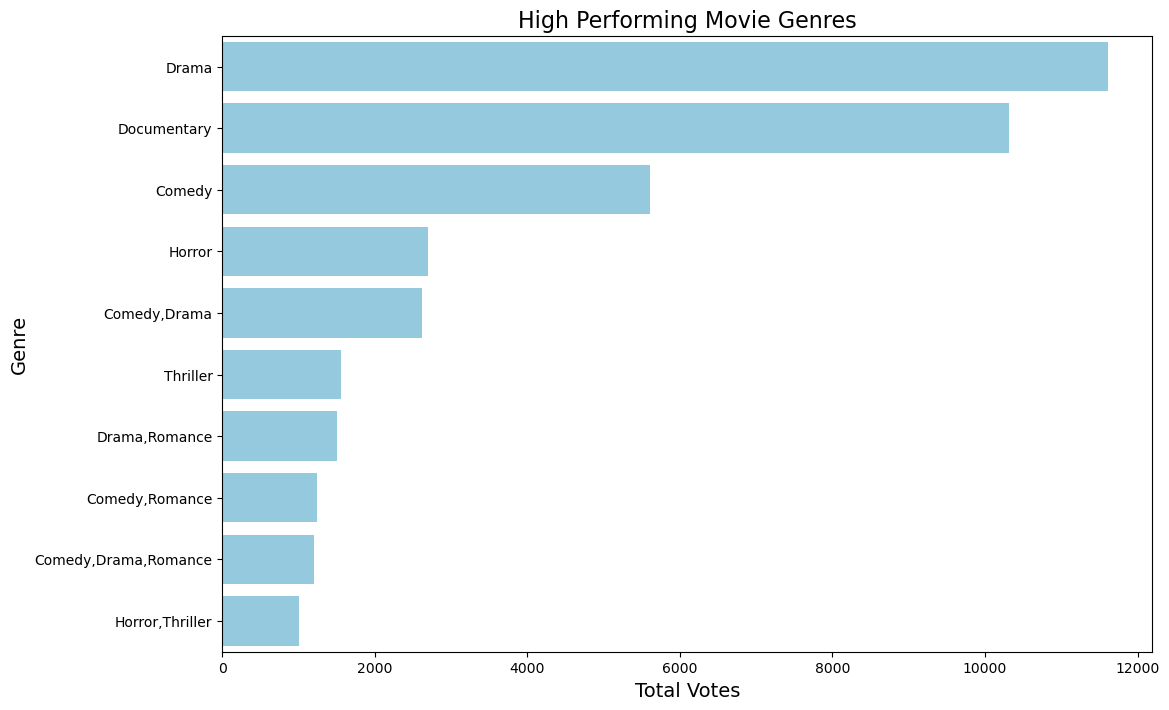

In [149]:
#Bar Graph showing high-performing movie genres
plt.figure(figsize=(12, 8))
sns.barplot(x='total_votes', y='genres', data=pop_genres_df.head(10), color='skyblue')

# Add title and labels
plt.title('High Performing Movie Genres', fontsize=16)
plt.xlabel('Total Votes', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***